In [2]:
!pip install pycaret[analysis] > /dev/null
!pip install shap > /dev/null

In [9]:
import pandas as pd

data = pd.read_csv("high_diamond_ranked_10min.csv" , sep = "," , header = 0 , encoding= 'utf-8')

In [10]:

# Eliminar filas con valores faltantes
data = data.dropna(axis=0)

In [11]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'blueWins',  fold=7, index=False, ignore_features = ['gameId', 'blueTotalJungleMinionsKilled','blueGoldDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redTotalJungleMinionsKilled','redGoldDiff', 'redCSPerMin', 'redGoldPerMin', 'redExperienceDiff', 'redFirstBlood', 'redTotalExperience', 'blueTotalExperience', 'redDeaths', 'redKills', 'redAssists'])

,Description,Value
0,Session id,843
1,Target,blueWins
2,Target type,Binary
3,Original data shape,"(9879, 40)"
4,Transformed data shape,"(9879, 24)"
5,Transformed train set shape,"(6915, 24)"
6,Transformed test set shape,"(2964, 24)"
7,Ignore features,16
8,Numeric features,23
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7265,0.0000,0.7294,0.7246,0.7267,0.4531,0.4534,0.0486
lda,Linear Discriminant Analysis,0.7262,0.8076,0.7291,0.7243,0.7265,0.4525,0.4528,0.0829
lr,Logistic Regression,0.7249,0.8035,0.7262,0.7237,0.7248,0.4499,0.4501,0.7457
gbc,Gradient Boosting Classifier,0.7236,0.8032,0.7224,0.7235,0.7228,0.4473,0.4475,1.4286
ada,Ada Boost Classifier,0.7219,0.7993,0.7140,0.7249,0.7192,0.4438,0.4441,0.3386
rf,Random Forest Classifier,0.7184,0.7967,0.7143,0.7196,0.7168,0.4369,0.4370,1.0414
nb,Naive Bayes,0.7160,0.7899,0.7041,0.7205,0.7121,0.4319,0.4322,0.0443
et,Extra Trees Classifier,0.7137,0.7900,0.7047,0.7169,0.7106,0.4273,0.4275,0.7543
lightgbm,Light Gradient Boosting Machine,0.7119,0.7925,0.7111,0.7116,0.7113,0.4239,0.4240,0.3629
xgboost,Extreme Gradient Boosting,0.7034,0.7747,0.7001,0.7043,0.7020,0.4068,0.4070,0.1957


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=8314, solver='auto',
                tol=0.0001)

In [ ]:
modelo = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7186,0.7928,0.6937,0.7292,0.7110,0.4372,0.4377
1,0.7196,0.7979,0.7079,0.7241,0.7159,0.4392,0.4394
2,0.7095,0.7907,0.6917,0.7164,0.7038,0.4190,0.4192
3,0.7146,0.7929,0.7181,0.7123,0.7152,0.4292,0.4292
4,0.7287,0.8108,0.7323,0.7264,0.7293,0.4575,0.4575
5,0.7146,0.7916,0.7201,0.7114,0.7157,0.4292,0.4292
6,0.7234,0.8004,0.7363,0.7174,0.7267,0.4468,0.4470
Mean,0.7184,0.7967,0.7143,0.7196,0.7168,0.4369,0.4370
Std,0.0059,0.0066,0.0162,0.0065,0.0081,0.0118,0.0117


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Ajustar hiperparámetros con búsqueda en cuadrícula
modelo = tune_model(modelo, optimize='MCC', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7237,0.7976,0.7059,0.7311,0.7183,0.4473,0.4476
1,0.7156,0.8030,0.7160,0.7146,0.7153,0.4312,0.4312
2,0.7146,0.7925,0.6876,0.7259,0.7062,0.4291,0.4297
3,0.7115,0.7967,0.6937,0.7185,0.7059,0.4230,0.4233
4,0.7409,0.8171,0.7465,0.7375,0.7419,0.4818,0.4818
5,0.7237,0.7999,0.7221,0.7236,0.7228,0.4474,0.4474
6,0.7264,0.8030,0.7606,0.7116,0.7353,0.4529,0.4540
Mean,0.7223,0.8014,0.7189,0.7232,0.7208,0.4447,0.4450
Std,0.0092,0.0073,0.0248,0.0085,0.0127,0.0183,0.0183


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 7 folds for each of 10 candidates, totalling 70 fits


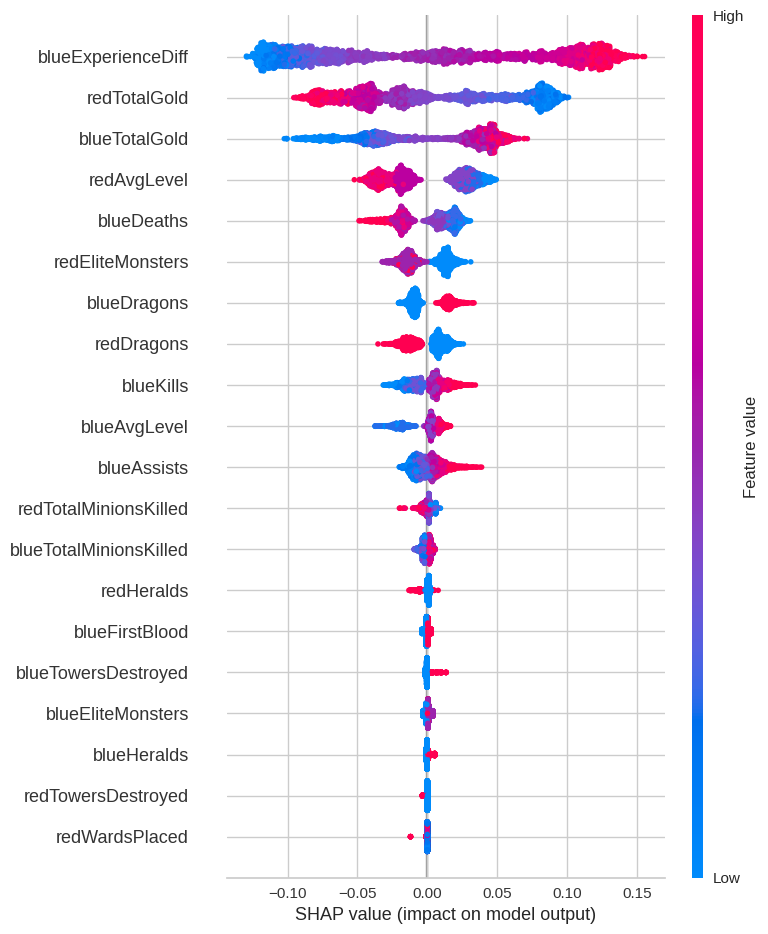

In [ ]:
interpret_model(modelo)

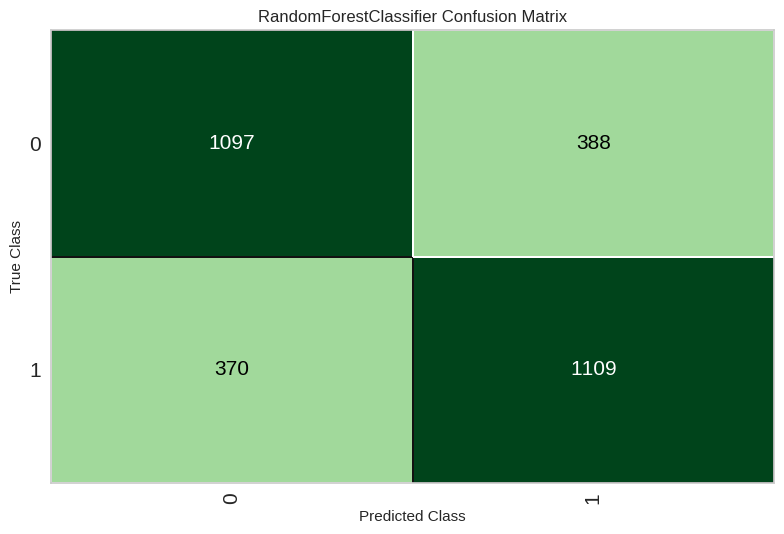

In [ ]:
evaluate_model(modelo)

In [ ]:
predictions = predict_model(modelo, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7325,0.8114,0.7418,0.7275,0.7346,0.4649,0.4650


In [ ]:
Eval = {
    'blueWardsPlaced': [32], # 0 a 50 normalmente
    'blueWardsDestroyed': [8], # 0 a 10
    'blueFirstBlood': [1], # 0 o 1
    'blueKills': [12], #0 a 15
    'blueDeaths': [2], # 0 a 15
    'blueAssists': [12], # 0 a 15
    'blueEliteMonsters': [1], # 0 a 2
    'blueDragons': [0], # 0 a 1
    'blueHeralds': [1], # 0 a 1
    'blueTowersDestroyed': [2], # 0 a 2 (comunmente 0)
    'blueTotalGold': [18500], # 15000 a 20000
    'blueAvgLevel': [7.24], # 6 a 8 (valen decimales)
    'blueTotalMinionsKilled': [200], # 150 a 250
    'blueExperienceDiff': [2000], # -9000 a 8000
    'redWardsPlaced': [27],
    'redWardsDestroyed': [12],
    'redAssists': [2],
    'redEliteMonsters': [1],
    'redDragons': [0],
    'redHeralds': [0],
    'redTowersDestroyed': [2],
    'redTotalGold': [17200],
    'redAvgLevel': [6],
    'redTotalMinionsKilled': [220]
}
df = pd.DataFrame(Eval)

In [ ]:
predictions = predict_model(modelo, data=df)
print(predictions)

   blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0               32                   8               1         12           2   

   blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           12                  1            0            1   

   blueTowersDestroyed  ...  redAssists  redEliteMonsters  redDragons  \
0                    2  ...           2                 1           0   

   redHeralds  redTowersDestroyed  redTotalGold  redAvgLevel  \
0           0                   2         17200            6   

   redTotalMinionsKilled  prediction_label  prediction_score  
0                    220                 1            0.7109  

[1 rows x 26 columns]


In [ ]:
modelo = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7267,0.8006,0.7160,0.7308,0.7234,0.4534,0.4535
1,0.7267,0.8088,0.7383,0.7208,0.7295,0.4535,0.4536
2,0.7206,0.7920,0.6998,0.7294,0.7143,0.4412,0.4416
3,0.7217,0.8057,0.7160,0.7234,0.7197,0.4433,0.4433
4,0.7429,0.8187,0.7606,0.7339,0.7470,0.4859,0.4862
5,0.7136,0.7926,0.7160,0.7117,0.7139,0.4271,0.4271
6,0.7224,0.8058,0.7363,0.7160,0.7260,0.4448,0.4450
Mean,0.7249,0.8035,0.7262,0.7237,0.7248,0.4499,0.4501
Std,0.0084,0.0087,0.0187,0.0075,0.0105,0.0168,0.0169


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7287,0.8005,0.7201,0.7320,0.7260,0.4575,0.4575
1,0.7257,0.8060,0.7241,0.7256,0.7249,0.4514,0.4514
2,0.7186,0.7974,0.6978,0.7273,0.7122,0.4372,0.4376
3,0.7217,0.8027,0.7181,0.7224,0.7202,0.4433,0.4433
4,0.7449,0.8187,0.7606,0.7367,0.7485,0.4899,0.4902
5,0.7136,0.7926,0.7160,0.7117,0.7139,0.4271,0.4271
6,0.7234,0.8058,0.7383,0.7165,0.7273,0.4468,0.4470
Mean,0.7252,0.8034,0.7250,0.7246,0.7247,0.4505,0.4506
Std,0.0092,0.0076,0.0183,0.0080,0.0111,0.0185,0.0185


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 7 folds for each of 10 candidates, totalling 70 fits


In [ ]:
predictions = predict_model(modelo, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7324,0.8100,0.7341,0.7308,0.7324,0.4647,0.4647


In [ ]:
Eval = {
    'blueWardsPlaced': [32], # 0 a 50 normalmente
    'blueWardsDestroyed': [8], # 0 a 10
    'blueFirstBlood': [1], # 0 o 1
    'blueKills': [12], #0 a 15
    'blueDeaths': [2], # 0 a 15
    'blueAssists': [12], # 0 a 15
    'blueEliteMonsters': [1], # 0 a 2
    'blueDragons': [0], # 0 a 1
    'blueHeralds': [1], # 0 a 1
    'blueTowersDestroyed': [2], # 0 a 2 (comunmente 0)
    'blueTotalGold': [18500], # 15000 a 20000
    'blueAvgLevel': [7.24], # 6 a 8 (valen decimales)
    'blueTotalMinionsKilled': [200], # 150 a 250
    'blueExperienceDiff': [2000], # -9000 a 8000
    'redWardsPlaced': [27], #Para el equipo rojo se usan los mismos que para el equipo azul, revisar que las caracteristicas sean iguales excepto por el color del equipo
    'redWardsDestroyed': [12],
    'redAssists': [2],
    'redEliteMonsters': [1],
    'redDragons': [0],
    'redHeralds': [0],
    'redTowersDestroyed': [2],
    'redTotalGold': [17200],
    'redAvgLevel': [6],
    'redTotalMinionsKilled': [220]
}
df = pd.DataFrame(Eval)

In [ ]:
predictions = predict_model(modelo, data=df)
print(predictions)

   blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0               32                   8               1         12           2   

   blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           12                  1            0            1   

   blueTowersDestroyed  ...  redAssists  redEliteMonsters  redDragons  \
0                    2  ...           2                 1           0   

   redHeralds  redTowersDestroyed  redTotalGold  redAvgLevel  \
0           0                   2         17200            6   

   redTotalMinionsKilled  prediction_label  prediction_score  
0                    220                 1            0.7829  

[1 rows x 26 columns]


In [ ]:
modelo = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6862,0.7342,0.6755,0.6894,0.6824,0.3724,0.3725
1,0.6842,0.7435,0.7059,0.6757,0.6905,0.3685,0.3688
2,0.6721,0.7315,0.6511,0.6786,0.6646,0.3441,0.3444
3,0.6903,0.7413,0.6937,0.6881,0.6909,0.3806,0.3806
4,0.6994,0.7712,0.7201,0.6907,0.7051,0.3988,0.3992
5,0.6721,0.7259,0.6653,0.6735,0.6694,0.3441,0.3441
6,0.6738,0.7294,0.7018,0.6641,0.6824,0.3476,0.3481
Mean,0.6826,0.7396,0.6876,0.6800,0.6836,0.3652,0.3654
Std,0.0097,0.0142,0.0227,0.0091,0.0127,0.0194,0.0194


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7034,0.7794,0.6978,0.7049,0.7013,0.4069,0.4069
1,0.7186,0.7888,0.7140,0.7198,0.7169,0.4372,0.4372
2,0.7034,0.7707,0.6795,0.7128,0.6957,0.4068,0.4073
3,0.6953,0.7846,0.6978,0.6935,0.6957,0.3907,0.3907
4,0.7338,0.8122,0.7485,0.7264,0.7373,0.4676,0.4679
5,0.7095,0.7778,0.6957,0.7146,0.7050,0.4190,0.4191
6,0.7072,0.7838,0.7343,0.6962,0.7147,0.4144,0.4150
Mean,0.7102,0.7853,0.7096,0.7097,0.7095,0.4204,0.4206
Std,0.0116,0.0122,0.0224,0.0112,0.0137,0.0233,0.0233


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 7 folds for each of 10 candidates, totalling 70 fits


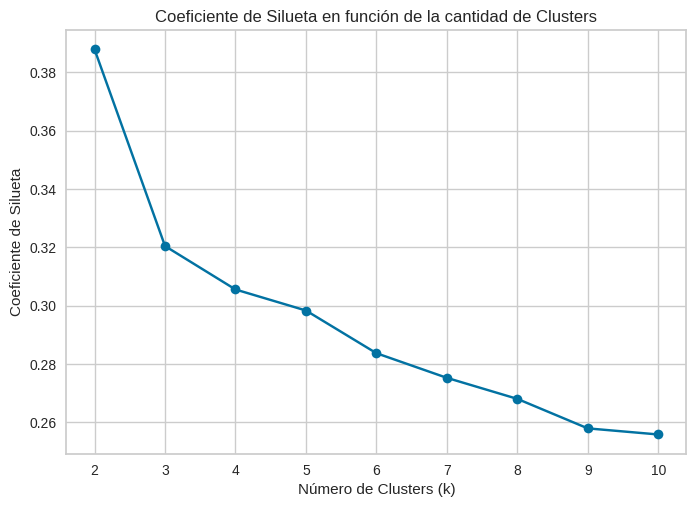

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

range_clusters = list(range(2, 11))  # Por ejemplo, de 2 a 10 clusters

# Lista para almacenar los resultados del coeficiente de silueta
silhouette_scores = []

# Calcular el coeficiente de silueta para cada cantidad de clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=123)
    cluster_labels = kmeans.fit_predict(get_config('X_train'))
    silhouette_avg = silhouette_score(get_config('X_train'), cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualizar el coeficiente de silueta en función de la cantidad de clusters
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta en función de la cantidad de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.show()

In [ ]:
predictions = predict_model(modelo, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9158,0.9809,0.9124,0.9183,0.9153,0.8316,0.8316


In [ ]:
Eval = {
    'blueWardsPlaced': [32], # 0 a 50 normalmente
    'blueWardsDestroyed': [8], # 0 a 10
    'blueFirstBlood': [1], # 0 o 1
    'blueKills': [12], #0 a 15
    'blueDeaths': [2], # 0 a 15
    'blueAssists': [12], # 0 a 15
    'blueEliteMonsters': [1], # 0 a 2
    'blueDragons': [0], # 0 a 1
    'blueHeralds': [1], # 0 a 1
    'blueTowersDestroyed': [2], # 0 a 2 (comunmente 0)
    'blueTotalGold': [18500], # 15000 a 20000
    'blueAvgLevel': [7.24], # 6 a 8 (valen decimales)
    'blueTotalMinionsKilled': [200], # 150 a 250
    'blueExperienceDiff': [2000], # -9000 a 8000
    'redWardsPlaced': [27],
    'redWardsDestroyed': [12],
    'redAssists': [2],
    'redEliteMonsters': [1],
    'redDragons': [0],
    'redHeralds': [0],
    'redTowersDestroyed': [2],
    'redTotalGold': [17200],
    'redAvgLevel': [6],
    'redTotalMinionsKilled': [220]
}
df = pd.DataFrame(Eval)

In [ ]:
predictions = predict_model(modelo, data=df)
print(predictions)

   blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0               32                   8               1         12           2   

   blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           12                  1            0            1   

   blueTowersDestroyed  ...  redAssists  redEliteMonsters  redDragons  \
0                    2  ...           2                 1           0   

   redHeralds  redTowersDestroyed  redTotalGold  redAvgLevel  \
0           0                   2         17200            6   

   redTotalMinionsKilled  prediction_label  prediction_score  
0                    220                 1            0.7548  

[1 rows x 26 columns]
